In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


In [2]:
strain_prev_filename = '/scratch/jx8fh/2024-04-24-whole-vol-preds-strain-and-errors.npy'
strain_prev_data = np.load(strain_prev_filename, allow_pickle=True).tolist()
check_dict(strain_prev_data)

MotionDecoder1x1                                             dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
UNetROri                                                     dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
UNetR1x1                                                     dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
StrainNetOri                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
StrainNet                                                    dict_keys(['strain_img_MSE_errors',

In [3]:
# strain_transUNet_filename = '/p/mmcardiac/Jerry/code/CINE-DENSE-Translation/review/2024-04/2024-04-24-whole-vol-preds/2024-04-24-whole-vol-preds-strain-and-errors.npy'
strain_transUNet_filename = '/scratch/jx8fh/2024-06-22-whole-vol-preds-strain-and-errors-TransUNet.npy'
strain_transUNet_data = np.load(strain_transUNet_filename, allow_pickle=True).tolist()
check_dict(strain_transUNet_data)

TransUNetOri                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
TransUNet1x1                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])


In [4]:
test_GT_data = np.load('/scratch/jx8fh/2024-04-16-test-data.npy', allow_pickle=True).tolist()
check_dict(test_GT_data[0])

patient_id                                                   033                 
DENSE_slice_mat_filename                                     /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-DENSE-data/033_S01_base_auto.1_ROI.1.mat
DENSE_slice_location                                         76.947609505431     
DENSE_frame_time_stamps                                      (51,)               
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_myo_masks                                              (48, 48, 51)        
DENSE_myo_mask_bbox                                          (34, 82, 40, 88)    
DENSE_myo_masks_rescaled                                     (128, 128, 51)      
DENSE_n_frames_all                                           51                  
DENSE_frame_indices_with_myo_contour                         (51,)               
out_of_box_flag        

In [5]:
import re

def filter_filenames_by_idx(filenames, target_idx):
    # Pattern matches: LaMoD-cine-{idx}-{id}-{location}.npy
    # where id can be numeric or UVA format, and location can be positive/negative
    pattern = r'LaMoD-DENSE-(\d+)-([A-Za-z0-9]+)-(-?\d+)\.npy'
    
    matching_files = []
    for filename in filenames:
        match = re.match(pattern, filename)
        if match and match.group(1) == str(target_idx).zfill(3):
            matching_files.append(filename)
    
    return matching_files

import glob
from pathlib import Path
data_dir = Path('/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/')
all_fnames = glob.glob(str(data_dir / 'LaMoD-DENSE-*.npy'))
target_idx = 41
# matching_files = [Path(data_dir, matched_fname) for matched_fname in filter_filenames_by_idx([Path(f).name for f in all_fnames], target_idx)]
matching_files = glob.glob(str(data_dir / f'LaMoD-DENSE-{target_idx:03d}-*.npy'))
print(matching_files)

['/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-041-Emory_04--94.npy']


In [7]:
# len(sector_strain_curves_pred_std)

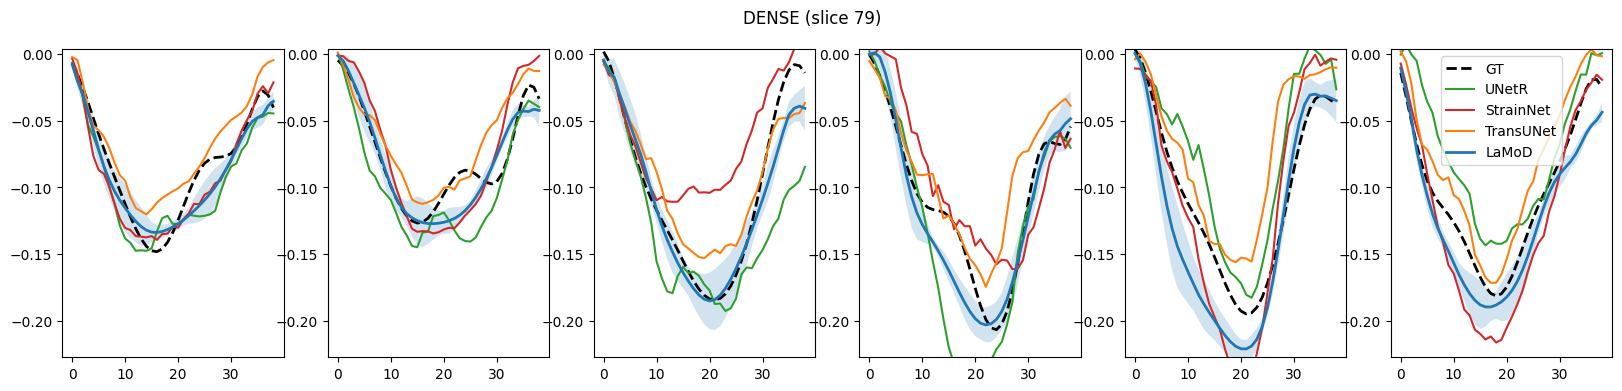

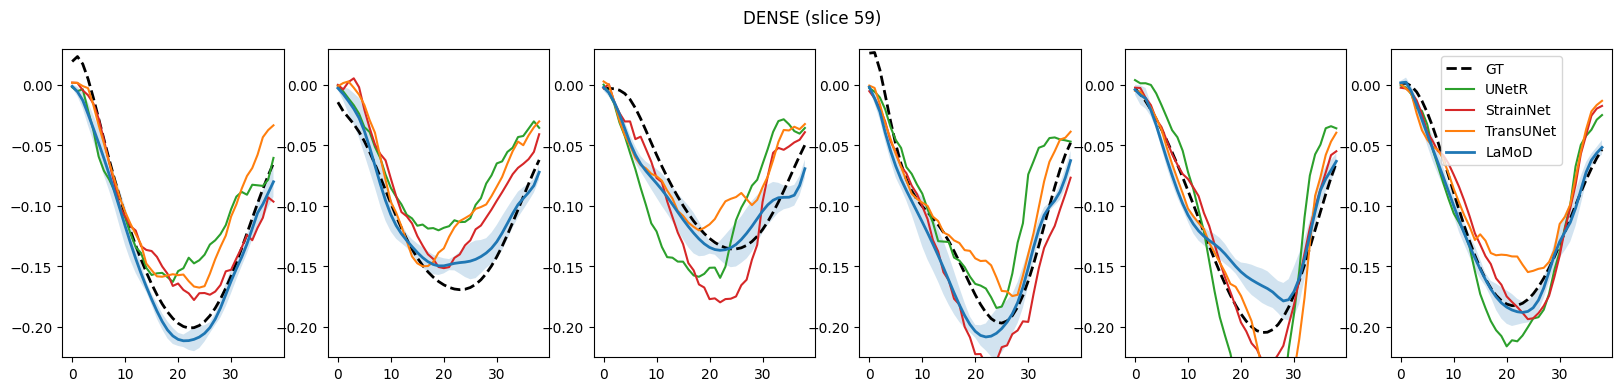

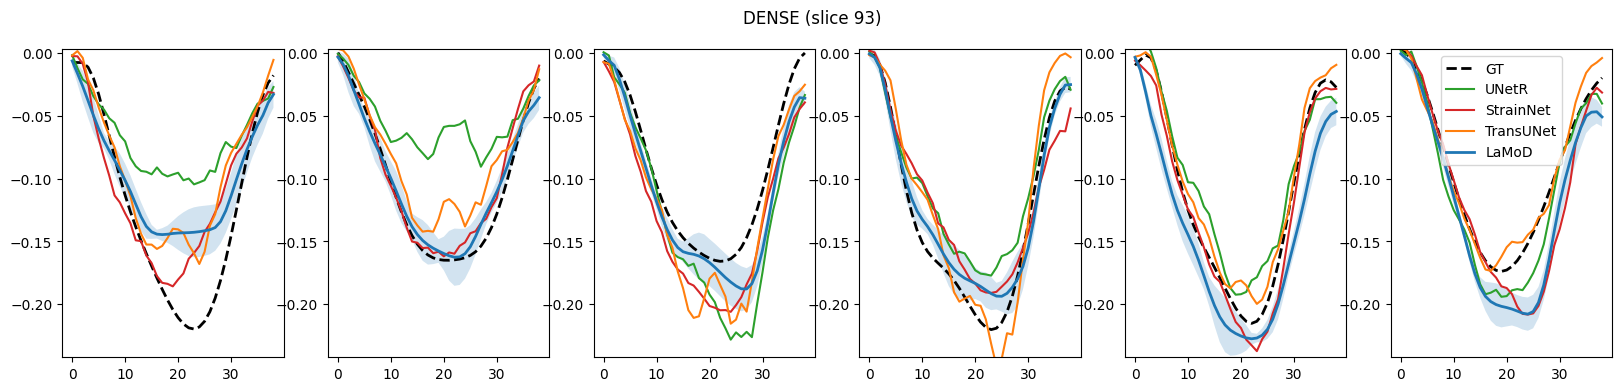

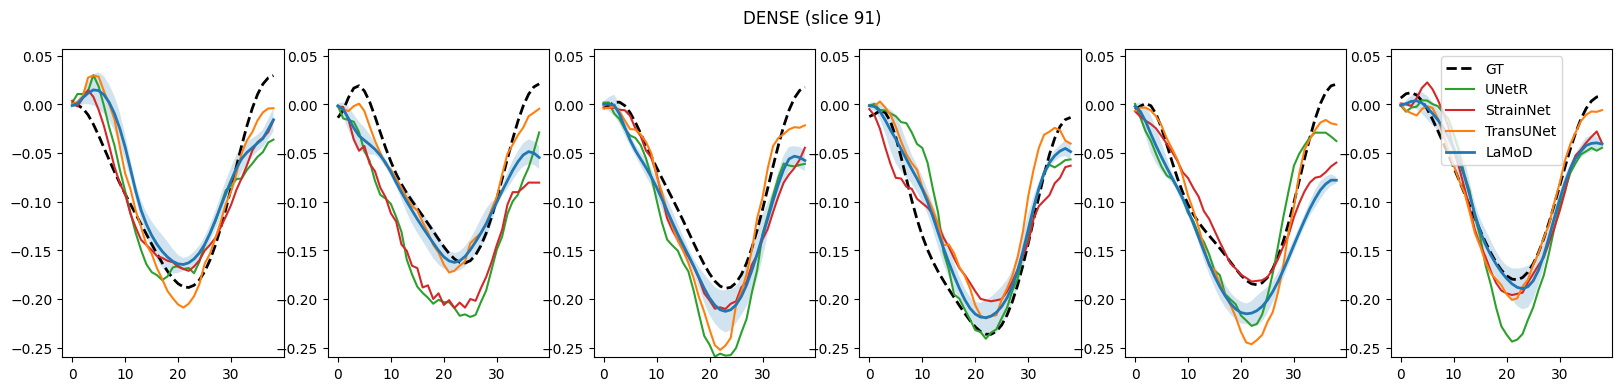

In [14]:
import os
# save_one_row_dir = '/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-06-plot-all-strain-curves/one-row'
# for datum_idx in range(len(strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'])):
linewidth_GT = 2
linewidth_ours = 2
linewidth_baseline = 1.5
for datum_idx in [79, 59, 93, 91]:
# for datum_idx in [59]:
    # datum_repeat_preds_fname = [Path(data_dir, matched_fname) for matched_fname in filter_filenames_by_idx([Path(f).name for f in all_fnames], datum_idx)][0]
    datum_repeat_preds_fname = matching_files = glob.glob(str(data_dir / f'LaMoD-DENSE-{datum_idx:03d}-*.npy'))[0]
    datum_repeat_preds = np.load(datum_repeat_preds_fname, allow_pickle=True).tolist()

    fig, axs = plt.subplots(1, 6, figsize=(20, 4))
    for sector_idx in range(6):
        strain_curve_GT = test_GT_data[datum_idx]['DENSE_strain_CCs6'][sector_idx, :-1]
        strain_curve_MotionDecoder = strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'][datum_idx]['CCs6'][sector_idx]
        strain_curve_UNetR = strain_prev_data['UNetROri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6'][sector_idx, :-1]
        strain_curve_StrainNet = strain_prev_data['StrainNetOri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6'][sector_idx, :-1]
        strain_curve_TransUNet = strain_transUNet_data['TransUNetOri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6'][sector_idx, :-1]

        strainmat_GT = test_GT_data[datum_idx]['DENSE_strain_CCs6']
        strainmat_GT_max = np.max(strainmat_GT[~np.isnan(strainmat_GT)])    
        strainmat_GT_min = np.min(strainmat_GT[~np.isnan(strainmat_GT)])

        # if datum_idx in [59, 79]:
        #     sector_strain_curves_pred_mean_raw = np.mean([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        #     sector_strain_curves_pred_std_raw = np.std([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        #     # interpolate to match the length of the strain_curve_MotionDecoder length
        #     sector_strain_curves_pred_mean = np.interp(np.linspace(0, 1, len(strain_curve_MotionDecoder)), np.linspace(0, 1, len(sector_strain_curves_pred_mean_raw)), sector_strain_curves_pred_mean_raw)
        #     sector_strain_curves_pred_std = np.interp(np.linspace(0, 1, len(strain_curve_MotionDecoder)), np.linspace(0, 1, len(sector_strain_curves_pred_std_raw)), sector_strain_curves_pred_std_raw)
        # else:
        sector_strain_curves_pred_mean = np.mean([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        sector_strain_curves_pred_std = np.std([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)

        min_curve_len = min(len(strain_curve_GT), len(strain_curve_MotionDecoder), len(strain_curve_UNetR), len(strain_curve_StrainNet), len(strain_curve_TransUNet), len(sector_strain_curves_pred_mean))
        # min_curve_len = -1

        axs[sector_idx].plot(strain_curve_GT[:min_curve_len], label='GT', linestyle='--', color='black', linewidth=linewidth_GT)
        

        axs[sector_idx].plot(strain_curve_UNetR[:min_curve_len], label='UNetR', linewidth=linewidth_baseline, color='tab:green')
        axs[sector_idx].plot(strain_curve_StrainNet[:min_curve_len], label='StrainNet', linewidth=linewidth_baseline, color='tab:red')
        axs[sector_idx].plot(strain_curve_TransUNet[:min_curve_len], label='TransUNet', linewidth=linewidth_baseline, color='tab:orange')

        axs[sector_idx].plot(strain_curve_MotionDecoder[:min_curve_len], label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
        axs[sector_idx].fill_between(np.arange(min_curve_len), strain_curve_MotionDecoder[:min_curve_len] - sector_strain_curves_pred_std[:min_curve_len], strain_curve_MotionDecoder[:min_curve_len] + sector_strain_curves_pred_std[:min_curve_len], alpha=0.2)
        # axs[sector_idx].fill_between(np.arange(len(strain_curve_MotionDecoder)), strain_curve_MotionDecoder[:len(strain_curve_MotionDecoder)] - sector_strain_curves_pred_std[:len(strain_curve_MotionDecoder)], strain_curve_MotionDecoder[:len(strain_curve_MotionDecoder)] + sector_strain_curves_pred_std[:len(strain_curve_MotionDecoder)], alpha=0.4)
        # axs[sector_idx].plot(sector_strain_curves_pred_mean, label='LaMoD', linewidth=linewidth_ours, color='blue')
        # axs[sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)

        # for row_idx in range(5):
            # axs[row_idx, sector_idx+2].set_xticks([])
        axs[sector_idx].set_ylim(strainmat_GT_min*1.1, strainmat_GT_max*1.1)
    axs[-1].legend()
    fig.suptitle(f'DENSE (slice {datum_idx})')
    # save figure
    # fig.savefig(os.path.join(save_one_row_dir, f'{datum_idx}.png'))

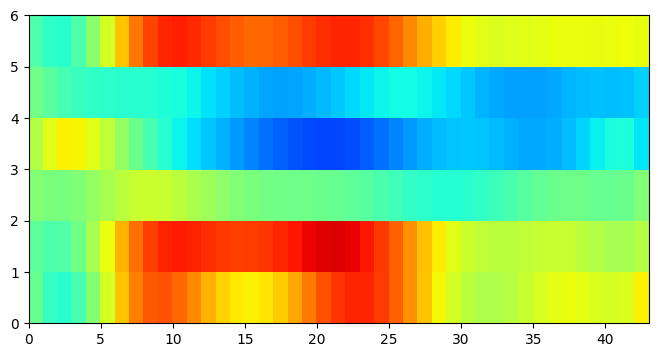

In [9]:
fig, axe = plt.subplots(1, 1, figsize=(8, 4))
axe.pcolor(test_GT_data[74]['DENSE_strain_CCs6'], cmap='jet', vmin=-0.2, vmax=0.2)

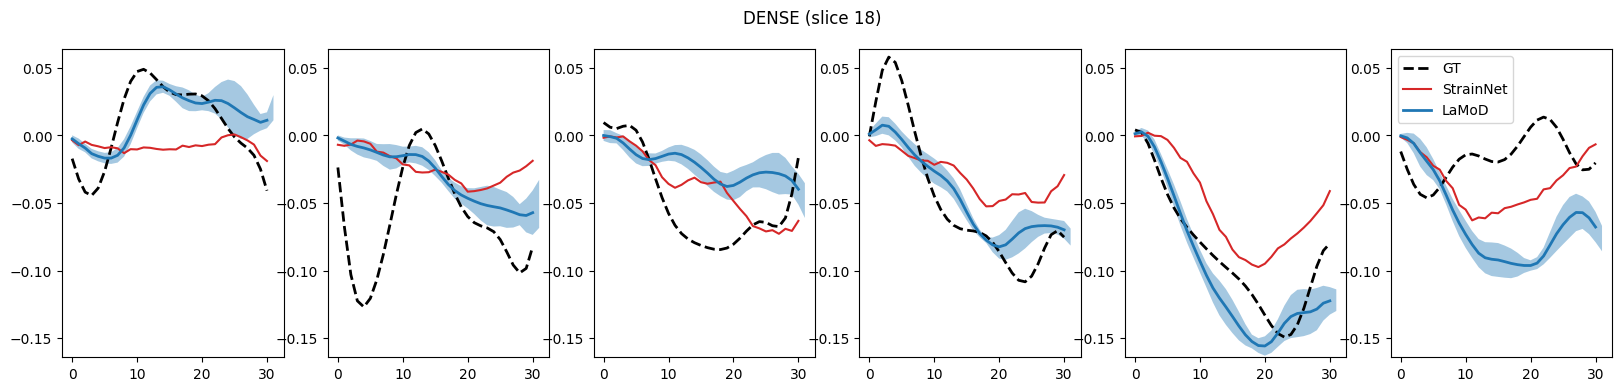

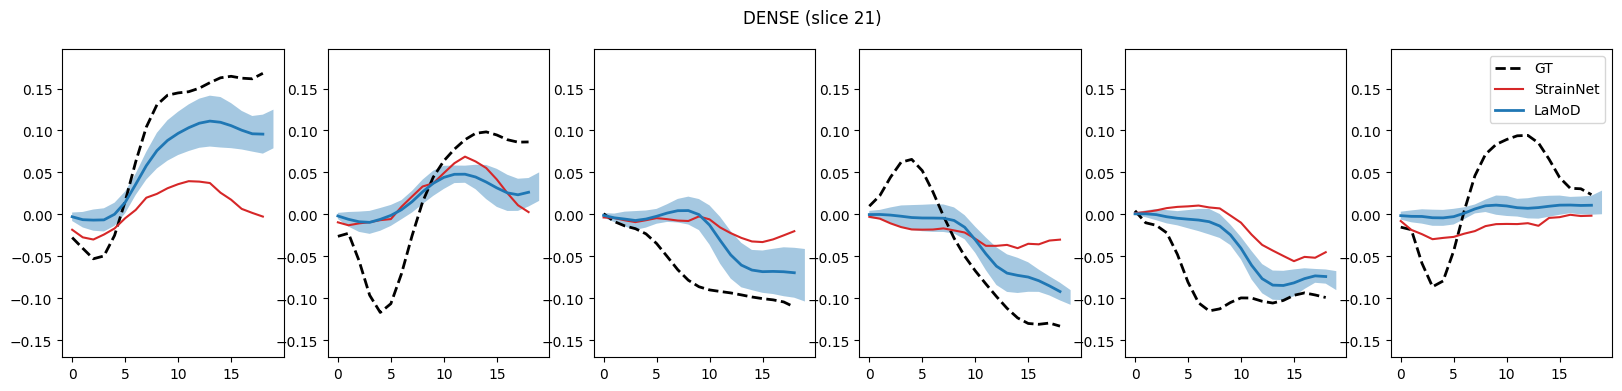

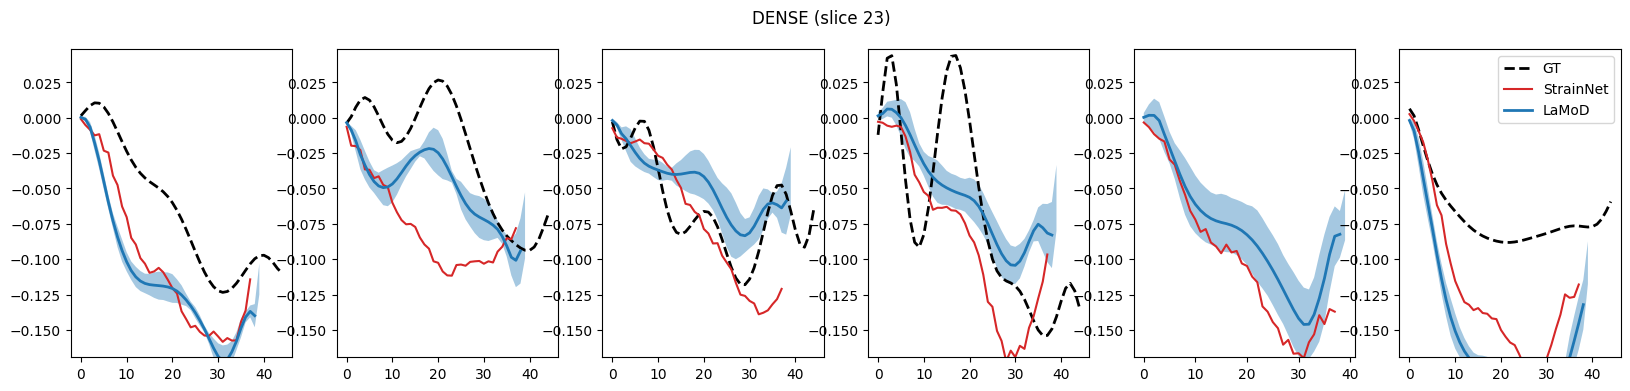

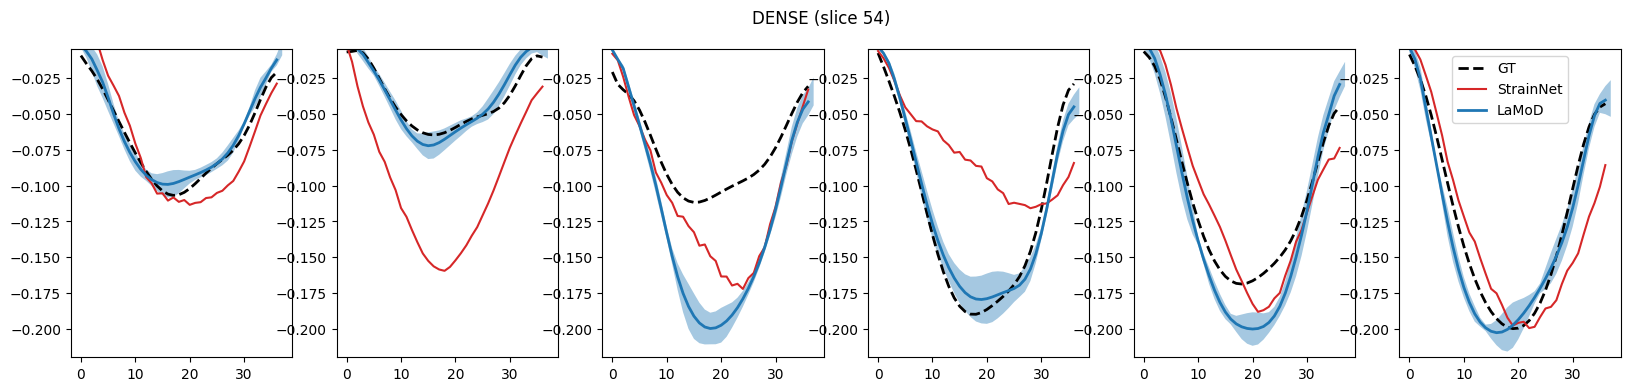

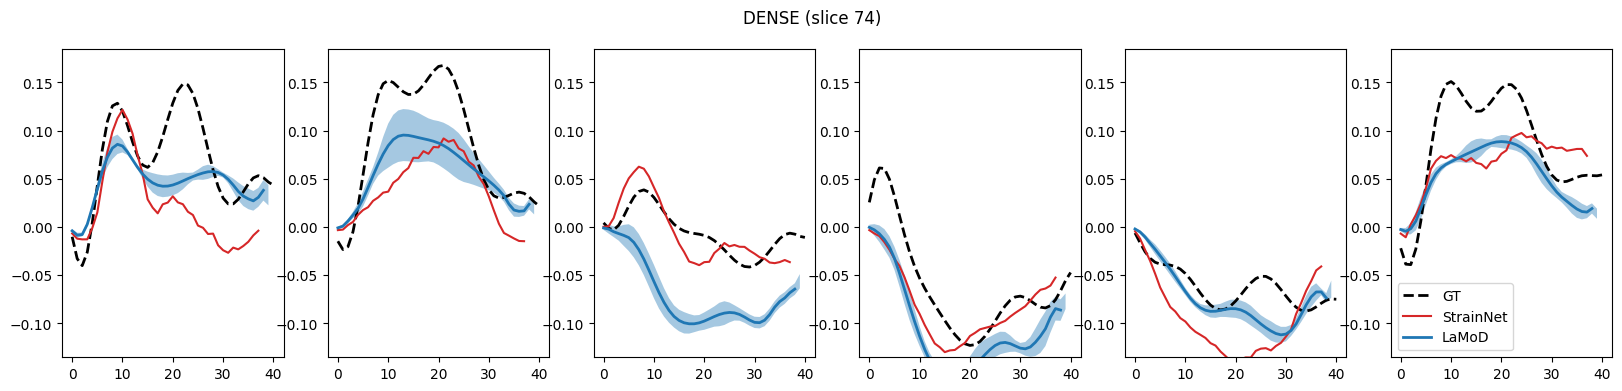

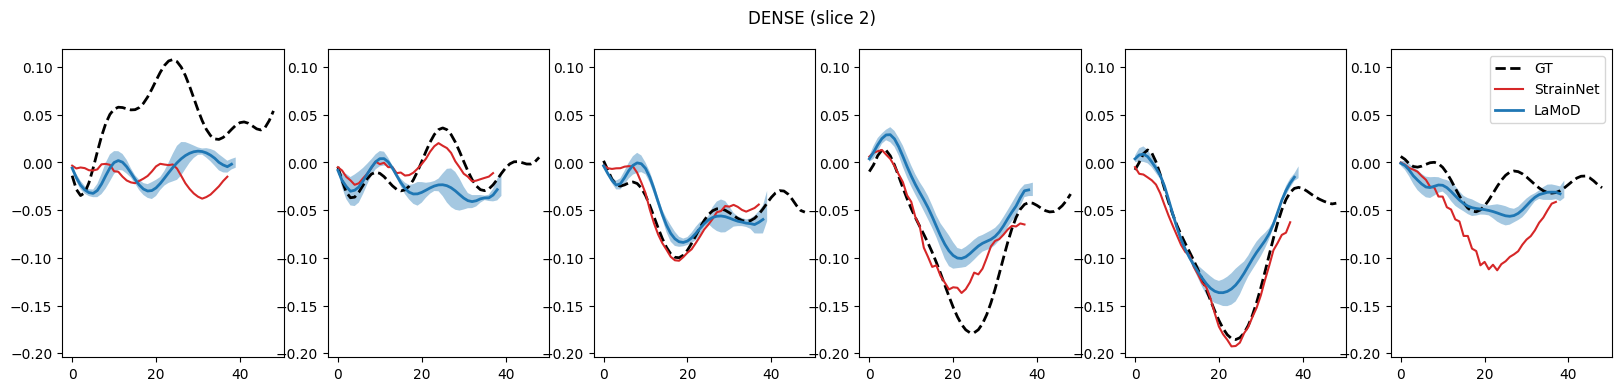

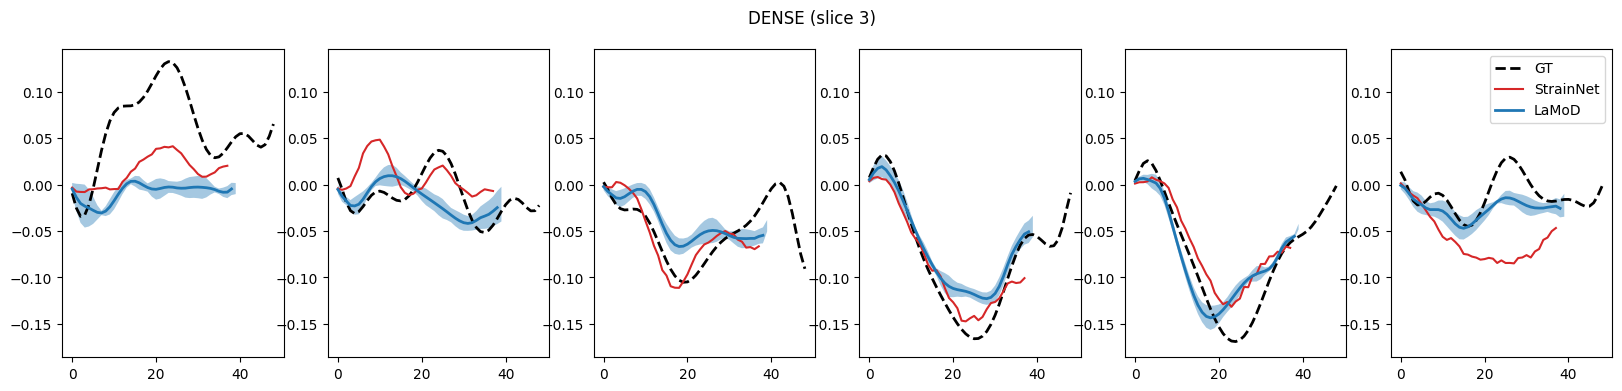

In [10]:
import os
# save_one_row_dir = '/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-06-plot-all-strain-curves/one-row'
# for datum_idx in range(len(strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'])):
linewidth_GT = 2
linewidth_ours = 2
linewidth_baseline = 1.5
for datum_idx in [18, 21, 23, 54, 74, 2, 3]:
# for datum_idx in [23, 54, 74, 2, 3]:
# for datum_idx in [59]:
    # datum_repeat_preds_fname = [Path(data_dir, matched_fname) for matched_fname in filter_filenames_by_idx([Path(f).name for f in all_fnames], datum_idx)][0]
    datum_repeat_preds_fname = matching_files = glob.glob(str(data_dir / f'LaMoD-DENSE-{datum_idx:03d}-*.npy'))[0]
    datum_repeat_preds = np.load(datum_repeat_preds_fname, allow_pickle=True).tolist()

    fig, axs = plt.subplots(1, 6, figsize=(20, 4))
    for sector_idx in range(6):
        strain_curve_GT = test_GT_data[datum_idx]['DENSE_strain_CCs6'][sector_idx, :-1]
        strain_curve_MotionDecoder = strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'][datum_idx]['CCs6'][sector_idx]
        strain_curve_UNetR = strain_prev_data['UNetROri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6'][sector_idx, :-1]
        strain_curve_StrainNet = strain_prev_data['StrainNetOri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6'][sector_idx, :-1]
        strain_curve_TransUNet = strain_transUNet_data['TransUNetOri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6'][sector_idx, :-1]

        strainmat_GT = test_GT_data[datum_idx]['DENSE_strain_CCs6']
        strainmat_GT_max = np.max(strainmat_GT[~np.isnan(strainmat_GT)])    
        strainmat_GT_min = np.min(strainmat_GT[~np.isnan(strainmat_GT)])

        # if datum_idx in [59, 79]:
        sector_strain_curves_pred_mean_raw = np.mean([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        sector_strain_curves_pred_std_raw = np.std([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        # interpolate to match the length of the strain_curve_MotionDecoder length
        sector_strain_curves_pred_mean = np.interp(np.linspace(0, 1, len(strain_curve_MotionDecoder)), np.linspace(0, 1, len(sector_strain_curves_pred_mean_raw)), sector_strain_curves_pred_mean_raw)
        sector_strain_curves_pred_std = np.interp(np.linspace(0, 1, len(strain_curve_MotionDecoder)), np.linspace(0, 1, len(sector_strain_curves_pred_std_raw)), sector_strain_curves_pred_std_raw)
        # else:
        #     sector_strain_curves_pred_mean = np.mean([pred['CCs6Resampled_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        #     sector_strain_curves_pred_std = np.std([pred['CCs6Resampled_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)

        # min_curve_len = min(len(strain_curve_GT), len(strain_curve_MotionDecoder), len(strain_curve_UNetR), len(strain_curve_StrainNet), len(strain_curve_TransUNet), len(sector_strain_curves_pred_mean))
        min_curve_len = -1

        axs[sector_idx].plot(strain_curve_GT[:min_curve_len], label='GT', linestyle='--', color='black', linewidth=linewidth_GT)
        

        # axs[sector_idx].plot(strain_curve_UNetR[:min_curve_len], label='UNetR', linewidth=linewidth_baseline)
        axs[sector_idx].plot(strain_curve_StrainNet[:min_curve_len], label='StrainNet', linewidth=linewidth_baseline, color='tab:red')
        # axs[sector_idx].plot(strain_curve_TransUNet[:min_curve_len], label='TransUNet', linewidth=linewidth_baseline)

        axs[sector_idx].plot(strain_curve_MotionDecoder[:min_curve_len], label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
        # axs[sector_idx].fill_between(np.arange(min_curve_len), strain_curve_MotionDecoder[:min_curve_len] - sector_strain_curves_pred_std[:min_curve_len], strain_curve_MotionDecoder[:min_curve_len] + sector_strain_curves_pred_std[:min_curve_len], alpha=0.2)
        axs[sector_idx].fill_between(np.arange(len(strain_curve_MotionDecoder)), strain_curve_MotionDecoder[:len(strain_curve_MotionDecoder)] - sector_strain_curves_pred_std[:len(strain_curve_MotionDecoder)], strain_curve_MotionDecoder[:len(strain_curve_MotionDecoder)] + sector_strain_curves_pred_std[:len(strain_curve_MotionDecoder)], alpha=0.4)
        # axs[sector_idx].plot(sector_strain_curves_pred_mean, label='LaMoD', linewidth=linewidth_ours, color='blue')
        # axs[sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
        axs[sector_idx].set_ylim(strainmat_GT_min*1.1, strainmat_GT_max*1.1)
    axs[-1].legend()
    fig.suptitle(f'DENSE (slice {datum_idx})')
    # save figure
    # fig.savefig(os.path.join(save_one_row_dir, f'{datum_idx}.png'))

In [11]:
len(sector_strain_curves_pred_mean)

40

In [12]:
len(sector_strain_curves_pred_std)

40